In [84]:
import numpy as np
import matplotlib.pyplot as plt

### Eigenvalues of diagonals and triangular matrices

In [82]:
# Generate diagonal and triangular matrices
n = 4
A = np.round(6*np.random.randn(n,n))
D = np.diag(np.arange(-3,21,4))
uT = np.triu([[4,5,2],[2,3,1],[4,7,9]])
lT = np.tril([[4,5,1],[2,3,7],[6,1,2]])
uT2 = np.triu(A)
lT2 = np.tril(A)

# print(D)
# print(uT)
# print(lT)
# print(uT2)
# print(lT2)
print(' ')

# Compute the eigenvalues
eigvD = np.linalg.eig(D)[0]
eigvuT = np.linalg.eig(uT)[0]
eigvlT = np.linalg.eig(lT)[0]
eigvuT2 = np.linalg.eig(uT2)[0]
eigvlT2 = np.linalg.eig(lT2)[0]

print(eigvD)
print(eigvuT)
print(eigvlT)
print(eigvuT2)
print(eigvlT2)

 
[-3.  1.  5.  9. 13. 17.]
[4. 3. 9.]
[2. 3. 4.]
[-4. 11.  2. -9.]
[-9.  2. 11. -4.]


### Eigenvalues of random matrices

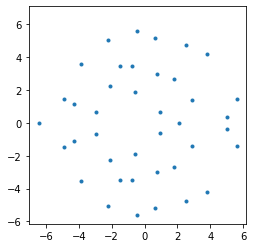

In [157]:
# Create a large random matrix
n = 40
A = np.random.randn(n,n)

# Extract eigenvalues
eigA = np.linalg.eig(A)[0]
x = eigA.real
y = eigA.imag

# Plot real and imaginary parts of matrix A eigenvalues
plt.plot(x,y,'.')
plt.axis('square')
plt.show()

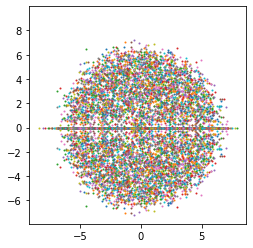

In [159]:
# Repeat same procedure for many random matrices
for i in range(200):
    
    M = np.random.randn(40,40)
    evals = np.linalg.eig(M)[0]
    
    plt.plot(np.real(evals),np.imag(evals),'.',markersize=2)

plt.axis('square')
plt.show()

### Eigendecomposition of matrix differences

In [250]:
# Create two random symmetric matrices
m = 3
A = np.random.randn(m,m)
B = np.random.randn(m,m)
A = A.T@A
B = B.T@B
print(A)
print(B)

[[ 0.53836496  1.1314583  -0.32835899]
 [ 1.1314583   6.55203654 -1.62332077]
 [-0.32835899 -1.62332077  1.66272852]]
[[ 1.37378513  0.18746206 -0.00512605]
 [ 0.18746206  2.22187566 -1.77857568]
 [-0.00512605 -1.77857568  3.07644509]]


In [255]:
# (A-B)v = lv
D,V = np.linalg.eig(A-B)
D2,V2 = np.linalg.eig(A@A - A@B - B@A + B@B)
D = np.diag(D)**2

print(D)
print(np.diag(D2))
print(V)
print(V2)

[[20.23964864  0.          0.        ]
 [ 0.          0.65066414  0.        ]
 [ 0.          0.          2.59592684]]
[[20.23964864  0.          0.        ]
 [ 0.          0.65066414  0.        ]
 [ 0.          0.          2.59592684]]
[[-0.17327435 -0.85802824  0.48349099]
 [-0.98473729  0.14276963 -0.09954546]
 [-0.01638499  0.49336028  0.86967072]]
[[-0.17327435 -0.85802824  0.48349099]
 [-0.98473729  0.14276963 -0.09954546]
 [-0.01638499  0.49336028  0.86967072]]


### Reconstruct a matrix from eigenlayers

In [414]:
# Create a symmetric matrix
m = 5
A = np.random.randn(m,m)
A = A.T@A

In [415]:
# Take its eigendecomposition
D,V = np.linalg.eig(A)

# D = np.diag(D)
# Compute norm of the outer product of two eigenvectors
outernorm = np.linalg.norm(np.outer(V[:,1],V[:,1]))

# Create one layer of A

v = np.reshape(V[:,0],(m,1))
layer1 = v * D[0] * v.T

print(outernorm)
print(' ')
print(np.linalg.norm(layer1))
print(D[0])
print(np.round(V.T@V))
print(np.linalg.norm(V))

0.9999999999999999
 
12.552155691653294
12.552155691653294
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0. -0.  0.]
 [ 0.  0.  1. -0. -0.]
 [ 0. -0. -0.  1. -0.]
 [ 0.  0. -0. -0.  1.]]
2.23606797749979


In [354]:
# Reconstruct A by summing over the eigenlayers
Arec = np.zeros((m,m))

for i in range(m):
        
    v = np.reshape(V[:,i],(m,1))
    Arec += v * D[i] * v.T
    print(np.linalg.matrix_rank(Arec))
    
print(np.round(A))
print(np.round(Arec))

1
2
3
4
5
[[ 9.  4.  4. -5.  1.]
 [ 4.  6.  3. -2. -0.]
 [ 4.  3.  6. -4. -2.]
 [-5. -2. -4.  5.  1.]
 [ 1. -0. -2.  1.  3.]]
[[ 9.  4.  4. -5.  1.]
 [ 4.  6.  3. -2. -0.]
 [ 4.  3.  6. -4. -2.]
 [-5. -2. -4.  5.  1.]
 [ 1. -0. -2.  1.  3.]]


### Trace and determinant. Eigenvalues sum and product

In [410]:
m = 6
n = 3
M = np.random.randn(m,n)@np.random.randn(n,m)
# M = M.T@M

3


In [412]:
tr = np.trace(M)
det = np.linalg.det(M)

D,V = np.linalg.eig(M)
sumD = sum(D)
prodD = np.prod(D)

print(np.round(D))
print(tr)
print(np.matrix.trace(M))
print(det)
print(sumD)
print(np.round(prodD,decimals=2))

[ 5.+0.j  1.+1.j  1.-1.j  0.+0.j -0.+0.j -0.+0.j]
5.913057794422862
5.913057794422862
-1.6202453112782512e-47
(5.913057794422864+0j)
-0j


In [ ]:
### GED in small and large matrices

import scipy.linalg
# Create 2 2x2 matrices
S = np.random.randn(2,2)
R = np.random.randn(2,2)

[ 1.22352407+0.j -0.6042664 +0.j]
[ 1.22352407+0.j -0.6042664 +0.j]
[[-0.89868041  0.5827502 ]
 [-0.43860405 -0.81265134]]
[[ 0.89868041 -0.5827502 ]
 [ 0.43860405  0.81265134]]


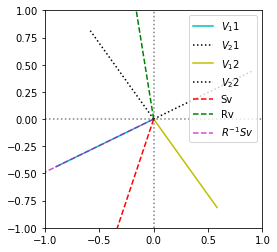

In [548]:
# GED on the matrices
D,V = scipy.linalg.eig(S,R)
D2,V2 = scipy.linalg.eig(np.linalg.inv(R)@S)

print(D)
print(D2)
print(V)
print(V2)

Sv = S@V[:,1]
Rv = R@V[:,0]
RinvSv = np.linalg.inv(R)@S@V[:,0]

# Plot the eigenvectors
plt.plot([0,V[0,0]],[0,V[1,0]],'c',label='$V_1$1')
plt.plot([0,V2[0,0]],[0,V2[1,0]],'k:',label='$V_2$1')
plt.plot([0,V[0,1]],[0,V[1,1]],'y',label='$V_1$2')
plt.plot([0,V2[0,1]],[0,V2[1,1]],'k:',label='$V_2$2')

plt.plot([0,Sv[0]],[0,Sv[1]],'r--',label='Sv')
plt.plot([0,Rv[0]],[0,Rv[1]],'g--',label='Rv')
plt.plot([0,RinvSv[0]],[0,RinvSv[1]],'m--',alpha=.7,label='$R^{-1}Sv$')

plt.plot([-1,1],[0,0],'k:',alpha=.5)
plt.plot([0,0],[-1,1],'k:',alpha=.5)

plt.axis('square')
plt.xlim([-1,1]), plt.ylim([-1,1])
plt.legend()
plt.show()

[0.73784775 0.87576635 0.88723854 0.91897858 0.97712091 1.00782673
 1.01728891 1.03107156 1.04896509 1.08786505 1.12754752 1.18606602
 1.21552158 1.52684853 1.70299903 2.43094372]


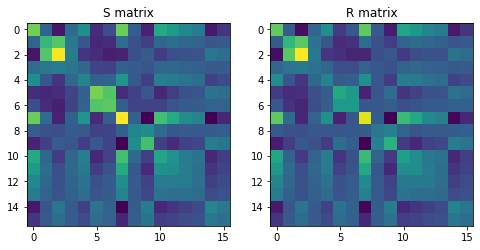

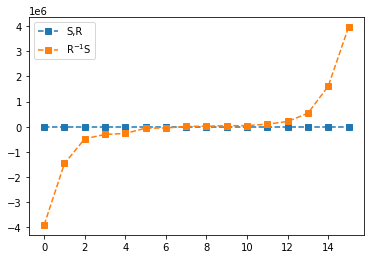

In [596]:
import scipy.io as sio

# GED with real data
Data = sio.loadmat('real_matrices.mat')
S = Data['S']
R = Data['R']

L,W = scipy.linalg.eigh(S,R)
L2,W2 = scipy.linalg.eigh(np.linalg.inv(R)@S)
print(L)

# Plot

fig,ax = plt.subplots(1,2,figsize=(8,5))
ax[0].imshow(S)
ax[0].set_title('S matrix')
ax[1].imshow(R)
ax[1].set_title('R matrix')

plt.show()

plt.plot(L,'s--',label='S,R')
plt.plot(L2,'s--',label='R$^{-1}$S')

# plt.ylim([0,3])
plt.legend()
plt.show()